# Imports

In [13]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from pathlib import Path

import missingno as msno

# Etape 1 : Charger les données

In [16]:


# Dossier contenant s CSV
data_folder = Path("Data")

# Boucle sur chaque fichier CSV du dossier
for csv_path in data_folder.glob("*.csv"):
    # On récupère le nom du fichier sans extension
    var_name = f"{csv_path.stem}_df"
    # On lit le CSV dans un DataFrame
    df = pd.read_csv(csv_path)
    # On crée dynamiquement la variable dans l'espace global
    globals()[var_name] = df

In [17]:
print(globals().keys())  # Affiche les noms des variables créées

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__vsc_ipynb_file__', '_i', '_ii', '_iii', '_i1', 'os', 'dataframes', 'data_folder', 'filename', 'filepath', 'df_name', '_i2', '_i3', 'np', '_i4', 'plt', 'pd', '_i5', '_i6', 'Path', '_i7', 'csv_path', 'var_name', 'df', 'EdStatsCountry_df', 'EdStatsCountry-Series_df', 'EdStatsData_df', 'EdStatsFootNote_df', 'EdStatsSeries_df', '_i8', '_i9', 'var_value', '_i10', '_i11', 'name', 'nb_doublons', 'colonnes_a_supprimer', 'colonnes_numériques', 'colonnes_cat', 'col', '_i12', '_i13', 'msno', '_i14', '_i15', 'colonnes_num', '_i16', '_i17'])


In [18]:
for var_name, var_value in list(globals().items()):
    if var_name.endswith("df") and isinstance(var_value, pd.DataFrame):
        print(f"=== {var_name} ===")
        print(var_value.head(), "\n")

=== df ===
           Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage

# Collecter les informations basiques des jeux de données


📊 === Analyse de 'EdStatsCountry' ===


📊 === Analyse de 'EdStatsCountry' avec Visualisation missingno ===

Visualisation des données manquantes :


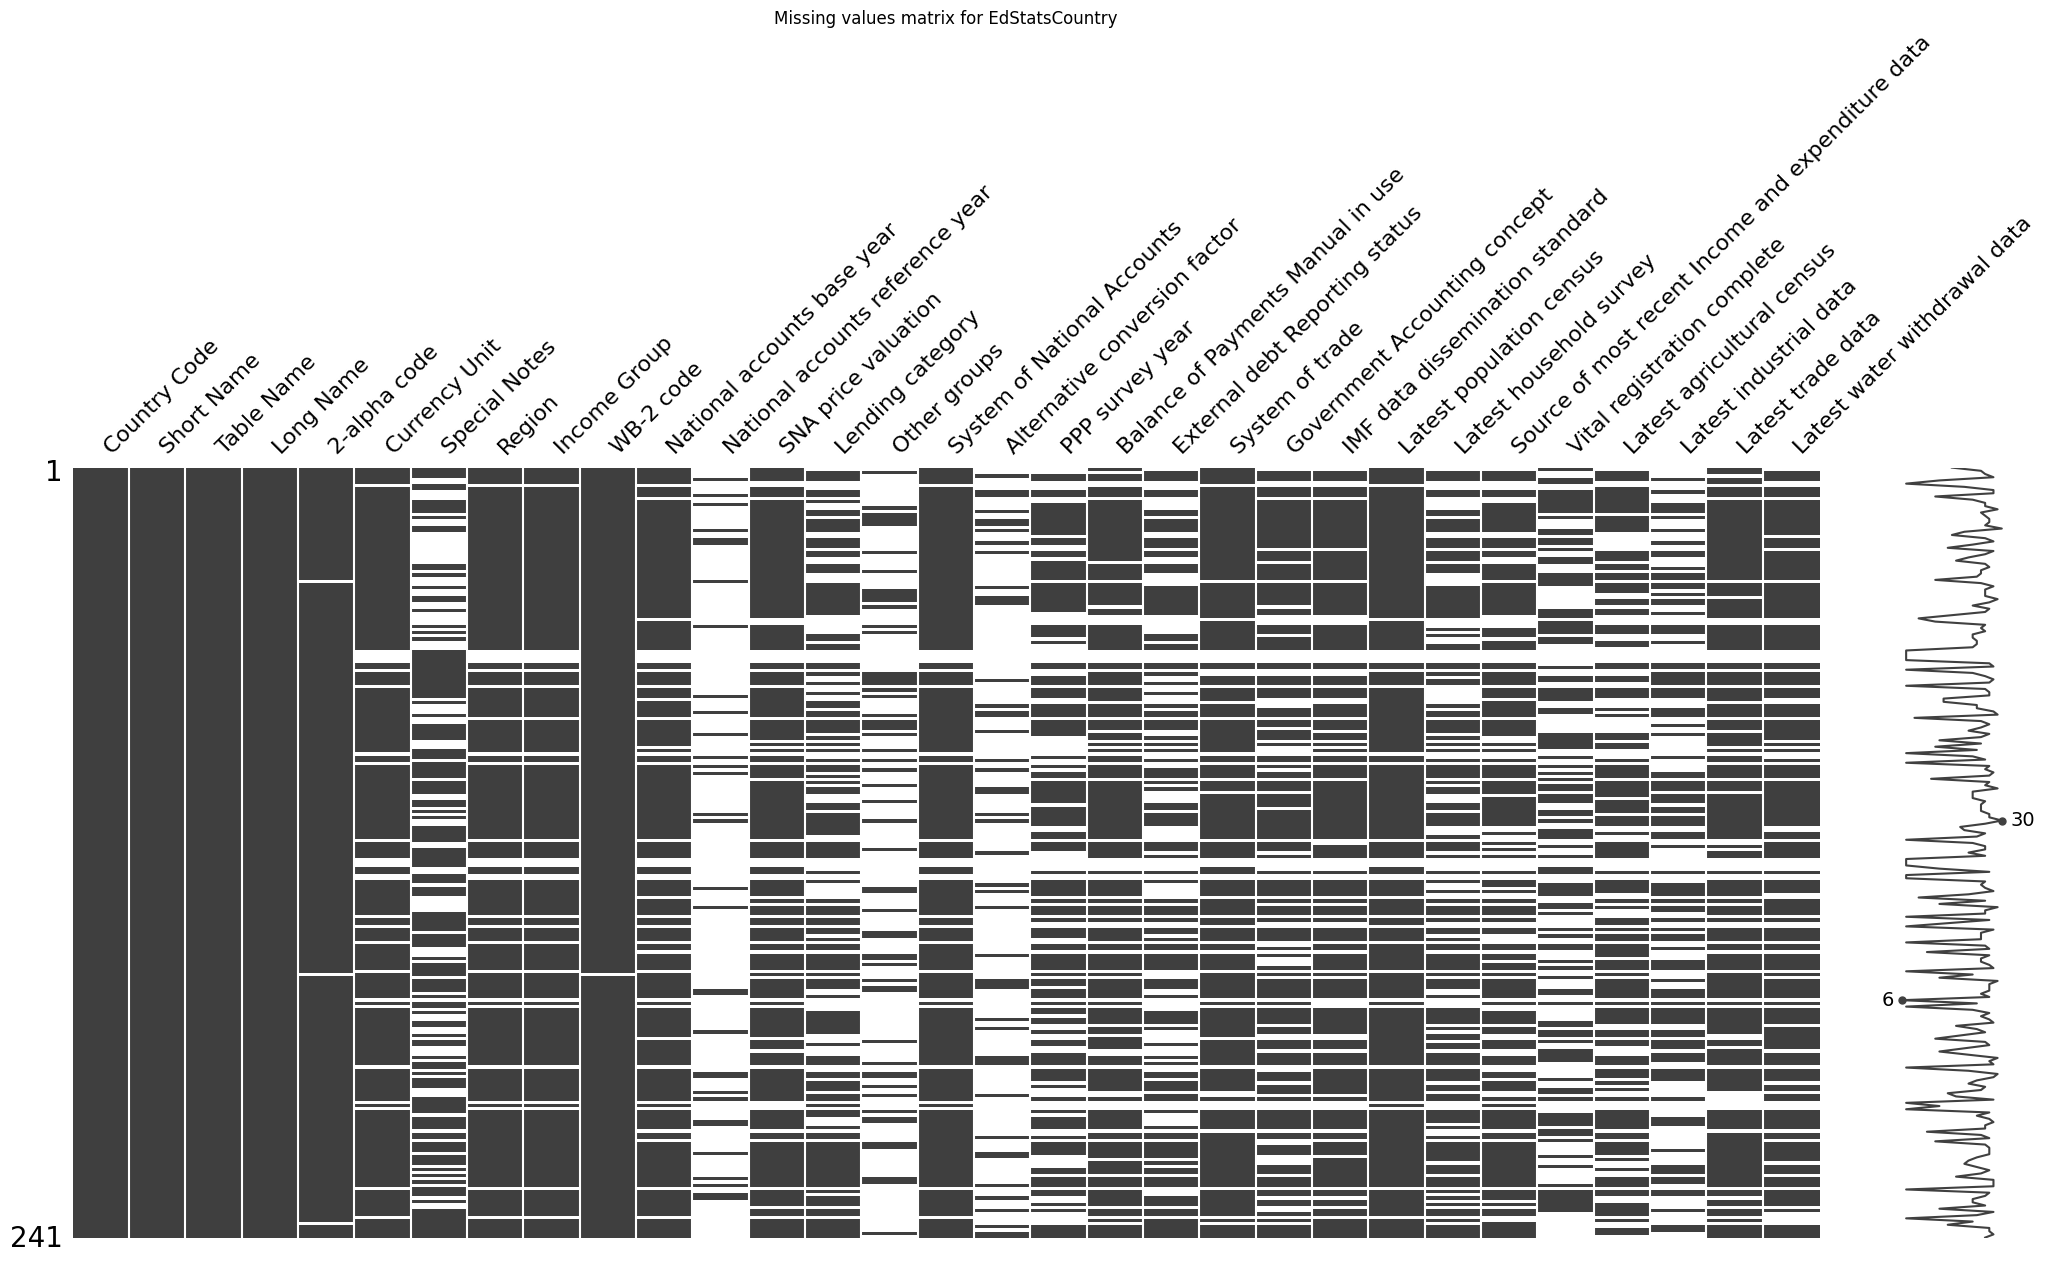

🔹 df.info() :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 

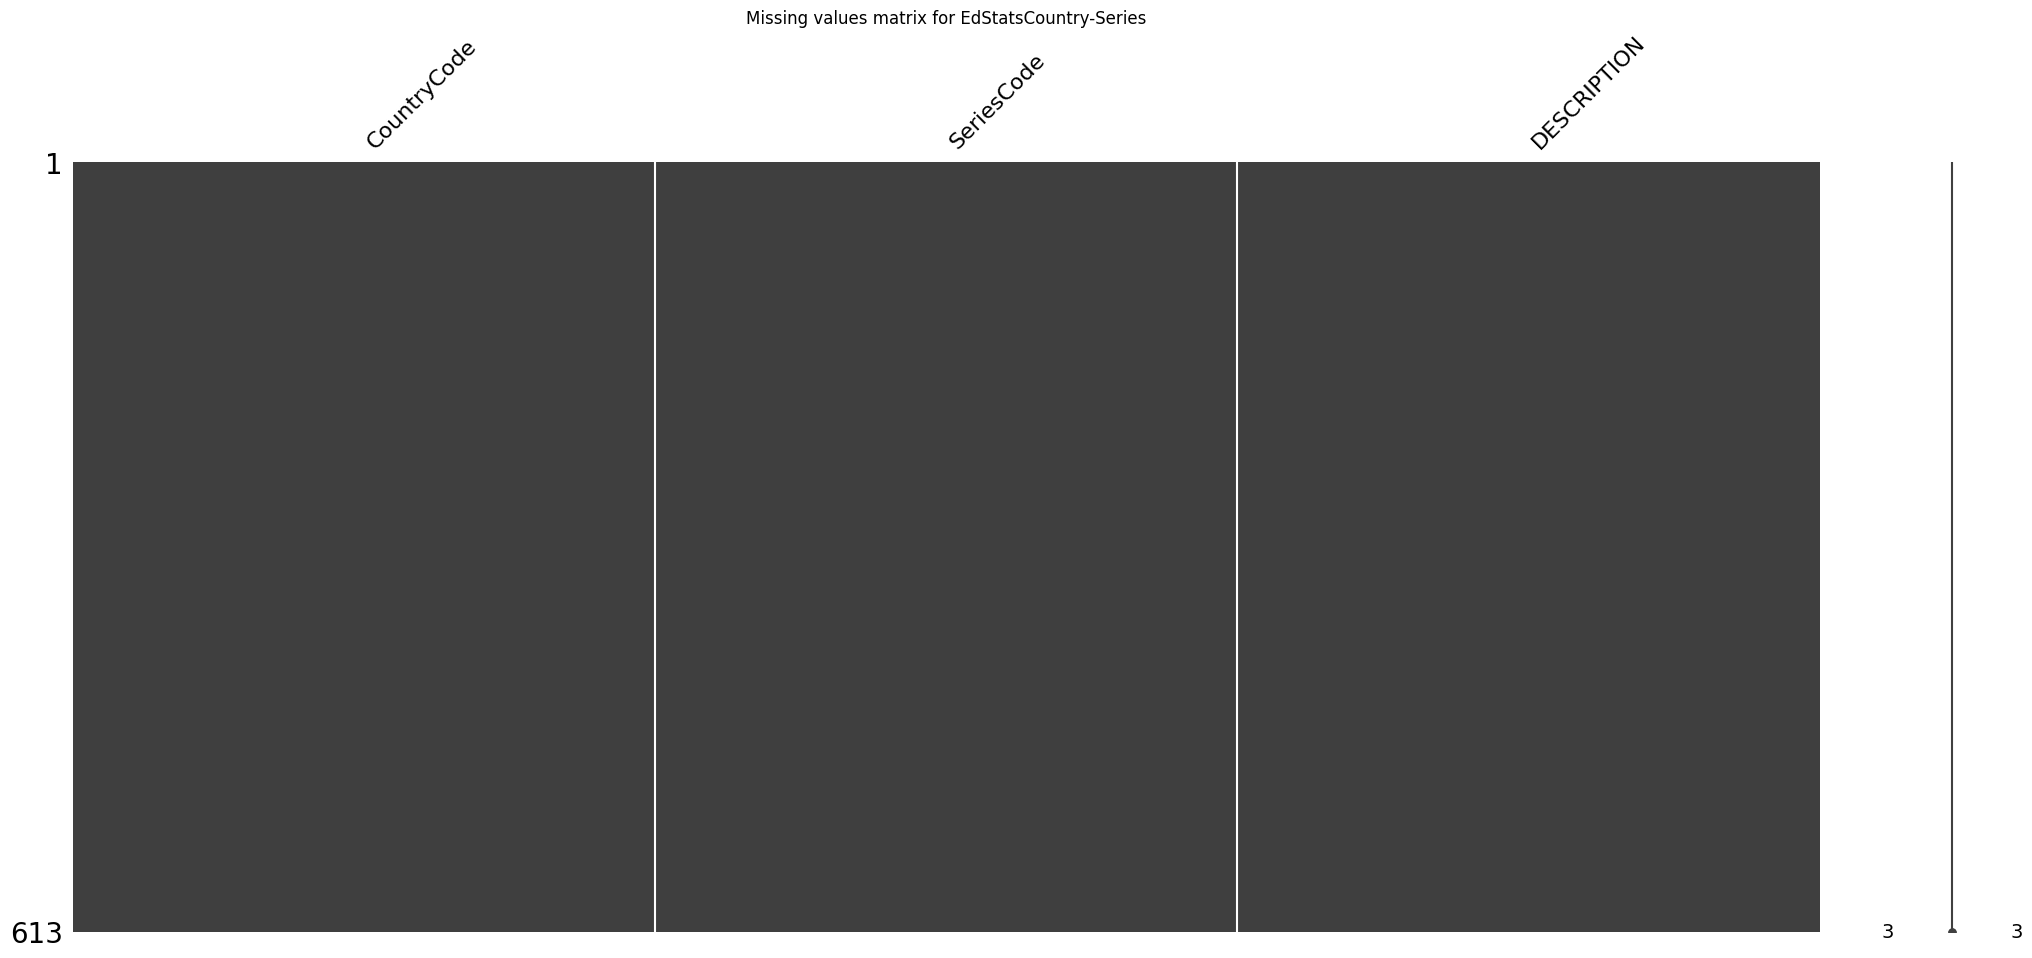

🔹 df.info() :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  613 non-null    object
 1   SeriesCode   613 non-null    object
 2   DESCRIPTION  613 non-null    object
dtypes: object(3)
memory usage: 14.5+ KB
None

🔹 df.head() :
  CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  
0  Data sources : United Nations World Population...  
1  Data sources: United Nations World Population ...  
2  Data sources: United Nations World Population ...  
3                 Estimates are based on regression.  
4  Data sources : United Nations World Population...  

🔸 df.shape : 613 lignes × 3 colonnes

🔸 df.duplicated().sum() : 0 do

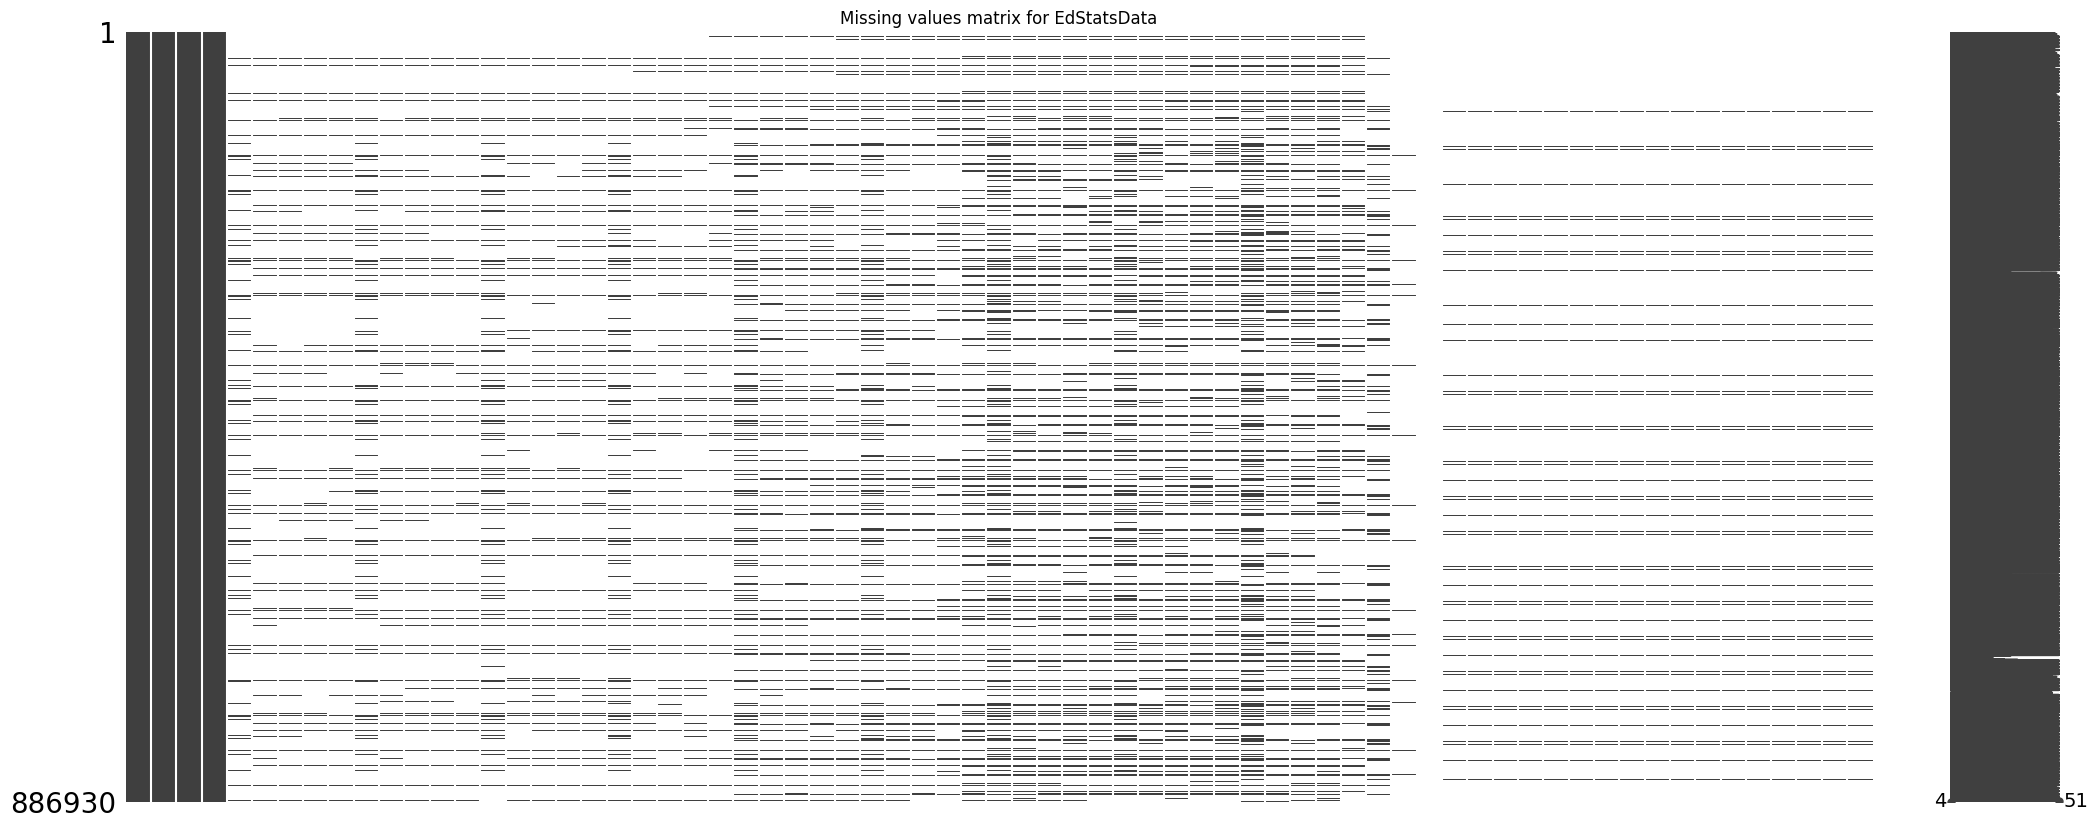

🔹 df.info() :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 69 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 

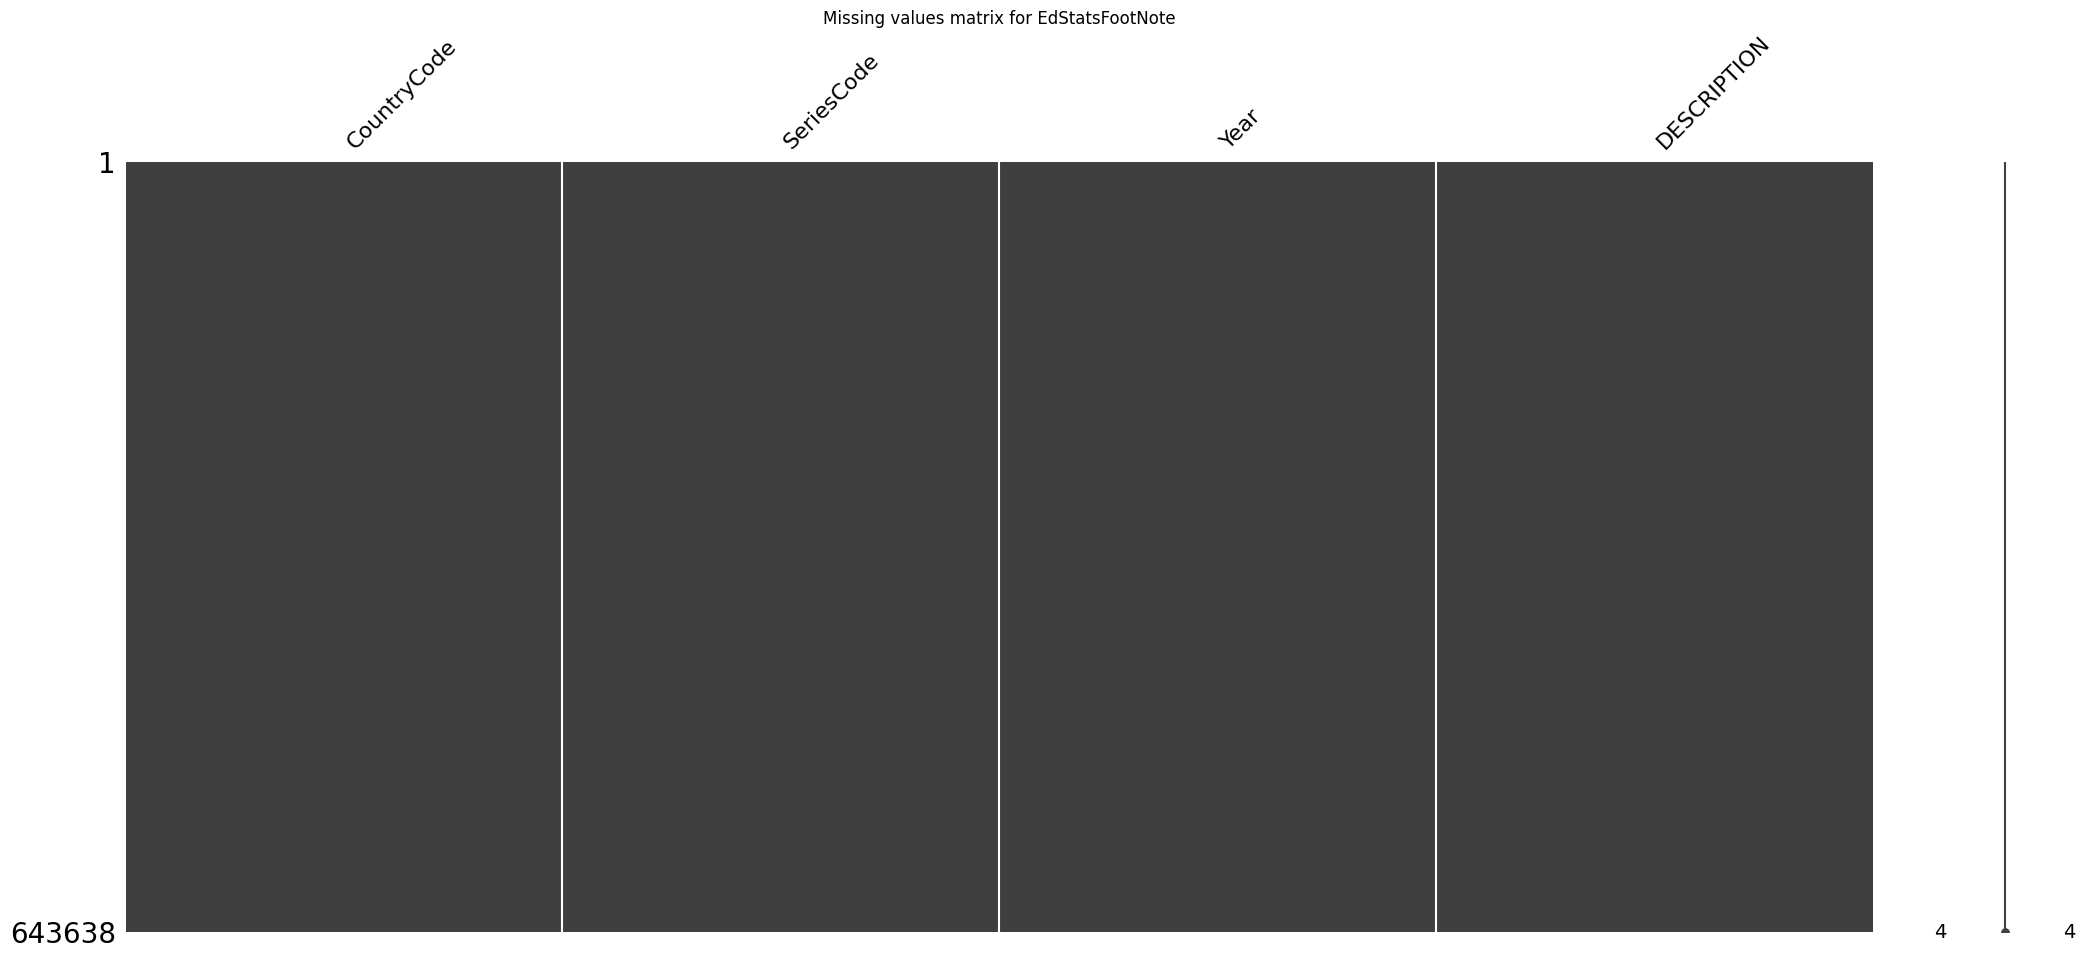

🔹 df.info() :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CountryCode  643638 non-null  object
 1   SeriesCode   643638 non-null  object
 2   Year         643638 non-null  object
 3   DESCRIPTION  643638 non-null  object
dtypes: object(4)
memory usage: 19.6+ MB
None

🔹 df.head() :
  CountryCode      SeriesCode    Year          DESCRIPTION
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.

🔸 df.shape : 643638 lignes × 4 colonnes

🔸 df.duplicated().sum() : 0 doublons

🔹 Proportion de valeurs manquantes :
CountryCode    0.0 %
SeriesCode     0.0 %
Year           0.0 %
DESCRIPTION    0.0 %
dtype: o

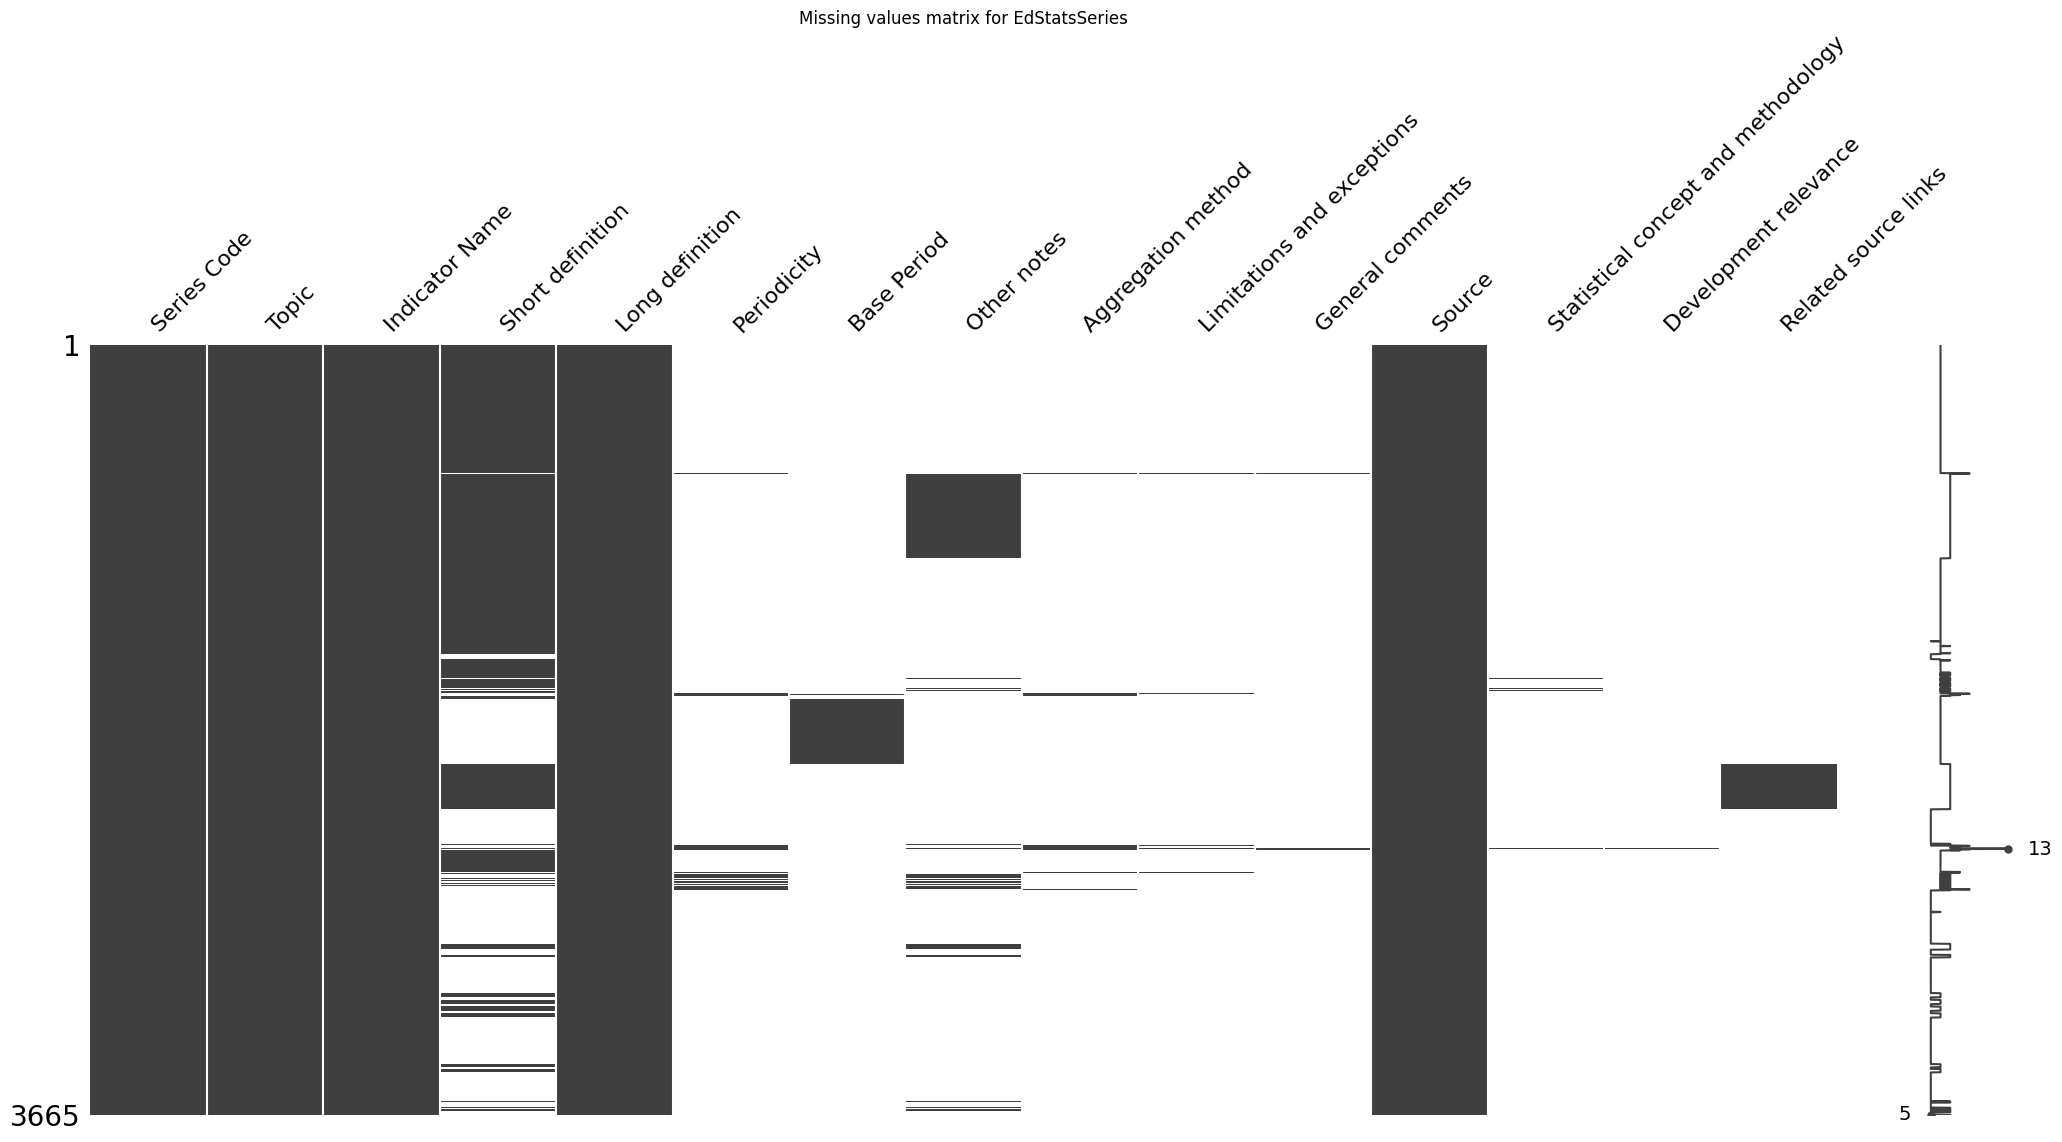

🔹 df.info() :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Series Code                          3665 non-null   object
 1   Topic                                3665 non-null   object
 2   Indicator Name                       3665 non-null   object
 3   Short definition                     2156 non-null   object
 4   Long definition                      3665 non-null   object
 5   Periodicity                          99 non-null     object
 6   Base Period                          314 non-null    object
 7   Other notes                          552 non-null    object
 8   Aggregation method                   47 non-null     object
 9   Limitations and exceptions           14 non-null     object
 10  General comments                     14 non-null     object
 11  Source                       

In [19]:
for name, df in dataframes.items():
    print(f"\n📊 === Analyse de '{name}' ===\n")

    print(f"\n📊 === Analyse de '{name}' avec Visualisation missingno ===\n")

    # Visualisation des valeurs manquantes
    print("Visualisation des données manquantes :")
    msno.matrix(df)
    plt.title(f"Missing values matrix for {name}")
    plt.show()

    # Aperçu général avec info()
    print("🔹 df.info() :")
    print(df.info())
    
    # Aperçu des premières lignes
    print("\n🔹 df.head() :")
    print(df.head())
    
    # Dimensions
    print(f"\n🔸 df.shape : {df.shape[0]} lignes × {df.shape[1]} colonnes")

    # Doublons
    print(f"\n🔸 df.duplicated().sum() : {df.duplicated().sum()} doublons")
    if df.duplicated().any():
        df.drop_duplicates(inplace=True)
        print(f"✅ Doublons supprimés → {df.shape[0]} lignes restantes")

    # Valeurs manquantes
    print("\n🔹 Proportion de valeurs manquantes :")
    print(df.isnull().mean().round(2).astype(str) + " %")
    
    # Colonnes numériques
    colonnes_num = df.select_dtypes('number').columns
    if len(colonnes_num) > 0:
        print("\n🔹 Statistiques describe() sur les colonnes numériques :")
        print(df[colonnes_num].describe().T)
    
    # Colonnes catégorielles
    colonnes_cat = df.select_dtypes('object').columns
    if len(colonnes_cat) > 0:
        for col in colonnes_cat:
            print(f"\n🔹 {col} - .unique() : {df[col].unique()}")
            print(f"🔹 {col} - .value_counts() :\n{df[col].value_counts(dropna=False)}")

    # Définition de ce que représente une ligne (basé sur structure simple)
    print("🔹 Définition d'une ligne :")
    print("- Aperçu des colonnes :", list(df.columns[:5]))
    print("- Il faut interpréter le sens selon les noms de colonnes (ex : pays, indicateurs...)")
    print("- Exemple de ligne :\n", df.iloc[0], "\n")

    # Dimensions
    print(f"🔸 Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes")

    # Doublons
    nb_doublons = df.duplicated().sum()
    print(f"🔸 Nombre de doublons : {nb_doublons}")
    if nb_doublons > 0:
        df.drop_duplicates(inplace=True)
        print(f"✅ Doublons supprimés → nouvelles dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes")

    # Valeurs manquantes par colonne
    print("\n🔹 Proportion de valeurs manquantes par colonne :")
    print((df.isna().mean() * 100).round(2).astype(str) + " %")

    # Suppression des colonnes inutilisables (100% manquantes ou une seule valeur)
    colonnes_a_supprimer = df.columns[
        (df.isna().all()) | (df.nunique(dropna=False) <= 1)
    ]
    if len(colonnes_a_supprimer) > 0:
        print(f"\n🗑️ Colonnes supprimées (vides ou constantes) : {list(colonnes_a_supprimer)}")
        df.drop(columns=colonnes_a_supprimer, inplace=True)

    # Analyse des colonnes numériques
    colonnes_numériques = df.select_dtypes(include=["number"]).columns
    if len(colonnes_numériques) > 0:
        print("\n🔹 Statistiques descriptives (colonnes numériques) :")
        print(df[colonnes_numériques].describe().T)
    else:
        print("\n⚠️ Aucune colonne numérique à analyser.")

    # Analyse des colonnes catégorielles
    colonnes_cat = df.select_dtypes(include="object").columns
    if len(colonnes_cat) > 0:
        print("\n🔹 Valeurs uniques (colonnes catégorielles) :")
        for col in colonnes_cat:
            print(f"\n📌 {col} :\n", df[col].value_counts(dropna=False))
    else:
        print("\n⚠️ Aucune colonne catégorielle à analyser.")
